In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyodbc sqlalchemy pandas
!pip install pyodbc
import pyodbc


In [3]:
# Connection string
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-GFNUUNQ;'   # replace with your server/instance
    'DATABASE=IPL_HISTORY_ANALYTICS;'
    'Trusted_Connection=yes;'
)


  ###### STEP 1: Test Query

In [4]:
df = pd.read_sql("SELECT TOP 5 * FROM stg_matches", conn)
df.head()


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_16360\924339482.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT TOP 5 * FROM stg_matches", conn)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,match_year
0,586,2,Rising Pune Supergiant,Delhi Daredevils,9,4,R Bhatia,CJ Anderson,1,0,1,,0,NA,NA,None,2017
1,586,2,Rising Pune Supergiant,Delhi Daredevils,9,5,MS Dhoni,CJ Anderson,1,0,1,,0,NA,NA,None,2017
2,586,2,Rising Pune Supergiant,Delhi Daredevils,9,6,R Bhatia,CJ Anderson,6,0,6,,0,NA,NA,None,2017
3,586,2,Rising Pune Supergiant,Delhi Daredevils,10,1,MS Dhoni,S Nadeem,1,0,1,,0,NA,NA,None,2017
4,586,2,Rising Pune Supergiant,Delhi Daredevils,10,2,R Bhatia,S Nadeem,0,0,0,,0,NA,NA,None,2017


#### note: Got warning for pyodbs so using sqlalchemy

In [5]:
!pip install sqlalchemy


In [6]:
from sqlalchemy import create_engine
import pandas as pd

In [7]:
# create connection string
conn_str = (
    "mssql+pyodbc://DESKTOP-GFNUUNQ/IPL_HISTORY_ANALYTICS"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

In [8]:

# create engine
engine = create_engine(conn_str)

In [9]:
# query with pandas
df = pd.read_sql("SELECT TOP 5 * FROM stg_matches", engine)
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,match_year
0,586,2,Rising Pune Supergiant,Delhi Daredevils,9,4,R Bhatia,CJ Anderson,1,0,1,,0,NA,NA,None,2017
1,586,2,Rising Pune Supergiant,Delhi Daredevils,9,5,MS Dhoni,CJ Anderson,1,0,1,,0,NA,NA,None,2017
2,586,2,Rising Pune Supergiant,Delhi Daredevils,9,6,R Bhatia,CJ Anderson,6,0,6,,0,NA,NA,None,2017
3,586,2,Rising Pune Supergiant,Delhi Daredevils,10,1,MS Dhoni,S Nadeem,1,0,1,,0,NA,NA,None,2017
4,586,2,Rising Pune Supergiant,Delhi Daredevils,10,2,R Bhatia,S Nadeem,0,0,0,,0,NA,NA,None,2017


##### Running SQL file

In [10]:
# Read the SQL file safely
with open("11_IPL_data_EDA_Day18.sql", "r", encoding="utf-8") as file:
    sql_script = file.read()

In [11]:
# 1. Remove GO statements
sql_script = sql_script.replace("GO", "")

In [12]:
# 2. Remove any weird characters (like »)
sql_script = sql_script.replace("»", "")

In [13]:
# 3. Split into individual queries if needed
queries = [q.strip() for q in sql_script.split(";") if q.strip()]


In [14]:
with open("11_IPL_data_EDA_Day18.sql", "r", encoding="utf-8-sig") as file:
    sql_script = file.read()

In [15]:
# Remove GO if any
sql_script = sql_script.replace("GO", "")


In [16]:
queries = [q.strip() for q in sql_script.split(";") if q.strip()]

In [ ]:
print(queries[0][:300])  # print first 300 characters


In [18]:
from sqlalchemy import text  #  import text

with engine.connect() as conn:
    conn.execute(text(queries[0]))  # run DDL/DML (CREATE, DROP, INSERT etc.)
    conn.commit()


In [19]:
with engine.connect() as conn:
    conn.execute(text(queries[0]))
    conn.commit()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter inline plots
%matplotlib inline


######  Example: Run a SQL query into DataFrame

In [21]:
query = """
SELECT TOP 50 batting_team, SUM(batsman_runs) AS total_runs
FROM stg_matches
GROUP BY batting_team
ORDER BY total_runs DESC;
"""

df = pd.read_sql(query, engine)
df.head()


,batting_team,total_runs
0,Mumbai Indians,39946
1,Royal Challengers Bengaluru,38599
2,Kolkata Knight Riders,37149
3,Chennai Super Kings,36739
4,Rajasthan Royals,33074


#### Basic Bar Chart

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_16360\2502955231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_runs", y="batting_team", data=df, palette="viridis")


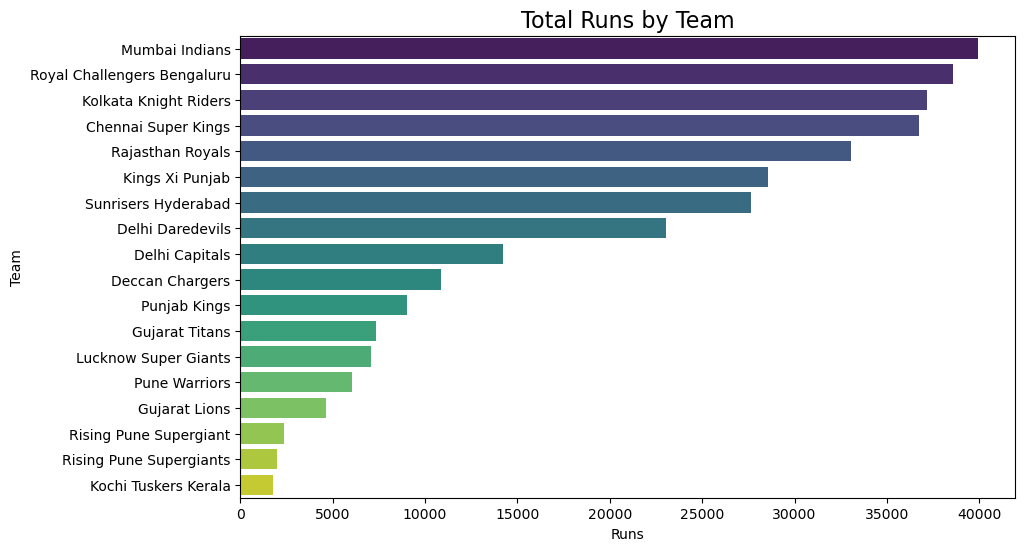

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_16360\2502955231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_runs", y="batting_team", data=df, palette="viridis")


<Axes: xlabel='total_runs', ylabel='batting_team'>

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x="total_runs", y="batting_team", data=df, palette="viridis")
plt.title("Total Runs by Team", fontsize=16)
plt.xlabel("Runs")
plt.ylabel("Team")
plt.show()
sns.barplot(x="total_runs", y="batting_team", data=df, palette="viridis")

#### Line chart

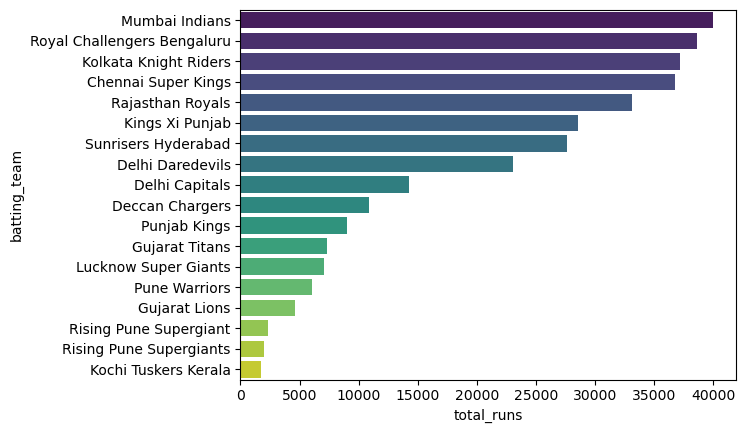

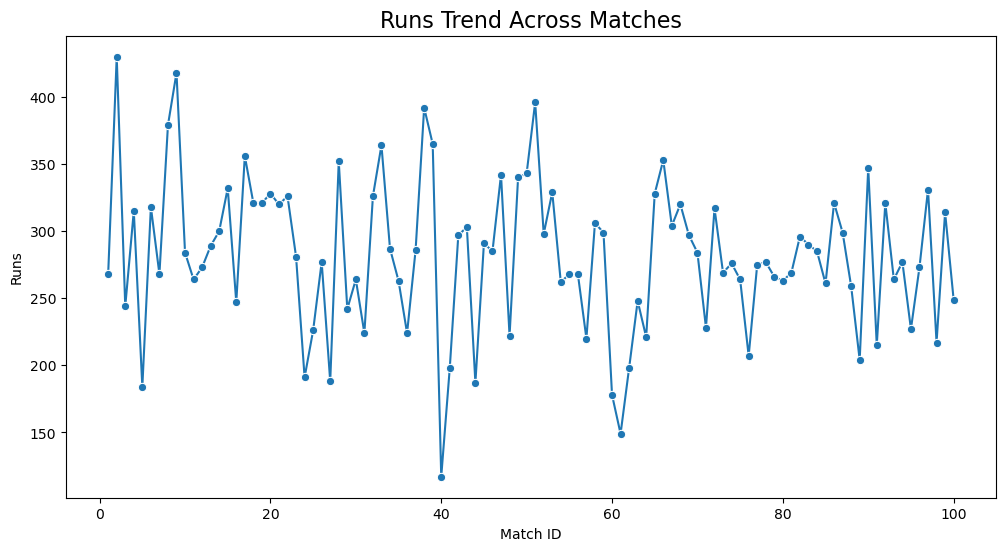

In [24]:
query = """
SELECT TOP 100 match_id, SUM(batsman_runs) AS runs
FROM stg_matches
GROUP BY match_id
ORDER BY match_id;
"""
df_line = pd.read_sql(query, engine)

plt.figure(figsize=(12,6))
sns.lineplot(x="match_id", y="runs", data=df_line, marker="o")
plt.title("Runs Trend Across Matches", fontsize=16)
plt.xlabel("Match ID")
plt.ylabel("Runs")
plt.show()
